## SIMULATION NOTEBOOK :)

In [1]:
from Simulator import Simulation, Vehicle, Client
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pickle

### GENERATE DATA FOR TRAINING

In [2]:
TABLE = 5

In [3]:
for TABLE in range(1,21):
    print('Generating table {}'.format(TABLE))
    # generate episode
    Event = Simulation(TABLE)
    break

    # initialize variables
    client = 0
    i = 0

    # store images (state and cliet requests)
    store_data = {}
    v_assignment = {}

    # generate first request
    client, state = Event.get_next_customer()


    while client != -1:
        # process client and store current state
        #print('Client ', i, 'Time: ', Event.time)
        store_data[i] = [state]

        # assign vehicle according to Claudia's policy
        next_vehicle = Event.rides[Event.rides.cust_id == client.ID].vehicle_id.values[0]
        v_assignment[i] = next_vehicle-1
        V = Event.vehicles[next_vehicle-1]
        V.assign_client(client)
        i += 1

        # update state and get next request
        client, state = Event.get_next_customer()


    # end episode: pick and drop all the remaining clients
    for v in Event.vehicles:
        #print('Finishing with ', v.ID)
        while len(v.clients) != 0 or len(v.clients_to_pick) != 0:
            # set time to 1000 to let the process continue until termination
            v.update(1000)

    # save data
    np.save('./simulation/data_vector_{}'.format(TABLE), store_data)
    np.save('./simulation/data_vector_y_{}'.format(TABLE), v_assignment)
    print('Finished without problems :) \n')
    break

Generating table 1


In [10]:
# store clients data
clients_info = []
for c in Event.customers:
    info = {
        'ID': c.ID, 'arrival': c.arrival, 'pickup_t': c.pickup_t, 'dropoff_t': c.dropoff_t
    }
    clients_info.append(info)
    
df_clients = pd.DataFrame(clients_info)

In [11]:
df_clients

,ID,arrival,pickup_t,dropoff_t
0,1,0.00,1000.000000,1000.000000
1,2,0.03,58.421820,65.178456
2,3,0.17,12.767222,26.353448
3,4,1.60,14.041124,30.494984
4,5,2.10,13.722116,28.988282
...,...,...,...,...
90,96,41.13,45.620726,54.418280
91,97,41.65,43.588770,55.355406
92,98,42.17,45.891000,72.590136
93,99,42.47,44.660274,51.506994


In [12]:
Event.rides

,vehicle_id,pickup_t,dropoff_t,excess_t,cust_id
1,1,8.605,20.046,11.441,1
2,2,7.793,10.821,3.028,2
3,1,5.545,35.049,29.504,3
4,1,9.190,28.208,19.018,4
5,1,13.770,33.729,19.959,5
...,...,...,...,...,...
96,1,56.498,58.708,2.210,96
97,5,53.759,70.937,17.178,97
98,6,55.304,75.955,20.651,98
99,5,57.701,62.892,5.191,99


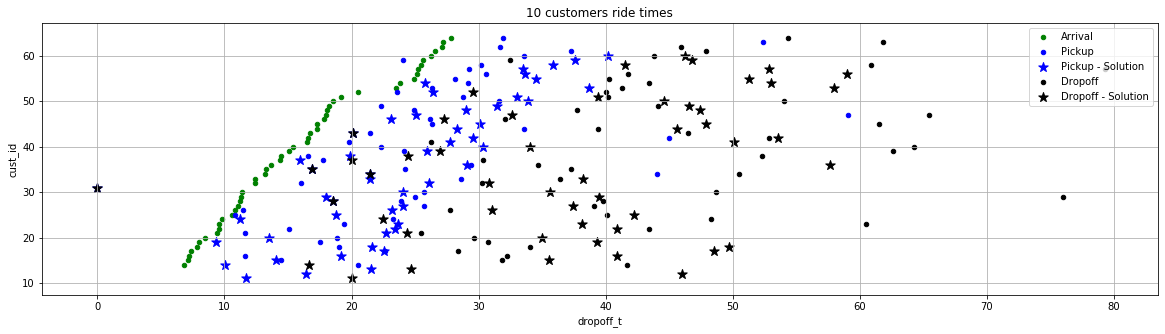

In [13]:
# comparison of results
simu = df_clients.iloc[10:60]
solution = Event.rides.iloc[10:60]

fig, ax = plt.subplots(figsize=(20,5))
simu.plot(kind='scatter', x='arrival', y='ID', ax=ax, c='green')
simu.plot(kind='scatter', x='pickup_t', y='ID', ax=ax, c='blue')
solution.plot(kind='scatter', x='pickup_t', y='cust_id', ax=ax, c='blue', marker='*', s=100)
simu.plot(kind='scatter', x='dropoff_t', y='ID', ax=ax, c='black')
solution.plot(kind='scatter', x='dropoff_t', y='cust_id', ax=ax, c='black', marker = '*', s=100)

#df_clients.iloc[1:10].plot(kind='scatter', x='max_time', y='ID', ax=ax, c='red')
plt.legend(['Arrival', 'Pickup', 'Pickup - Solution', 'Dropoff', 'Dropoff - Solution'], loc=1)
plt.grid()
plt.title('10 customers ride times')
plt.show()

In [14]:
df_clients.to_pickle('./simulation/clients_simu_{}.pkl'.format(TABLE))

In [15]:
comparison = pd.merge(df_clients, Event.rides, left_on='ID', right_on='cust_id', \
             suffixes=('_simu','_sol'))

comparison.to_pickle('./simulation/comparison_{}.pkl'.format(TABLE))

In [36]:
TABLE = 15
comparison = np.load('./simulation/comparison_{}.pkl'.format(TABLE), allow_pickle=True)

In [37]:
comparison

,ID,arrival,pickup_t_simu,dropoff_t_simu,vehicle_id,pickup_t_sol,dropoff_t_sol,excess_t,cust_id
0,1,0.00,1000.000000,1000.000000,1,2.177,10.020,7.843,1
1,2,0.97,18.309496,27.240484,1,9.329,20.794,11.465,2
2,3,1.72,14.541790,45.145156,2,7.872,8.875,1.003,3
3,4,1.98,15.815692,34.977520,2,14.398,16.739,2.341,4
4,5,2.40,15.496684,38.240938,2,3.002,5.117,2.115,5
...,...,...,...,...,...,...,...,...,...
90,96,33.50,35.641966,55.103134,16,44.267,57.571,13.304,96
91,97,33.82,37.362712,67.853206,2,35.924,43.691,7.767,97
92,98,33.97,39.941692,54.254080,23,49.186,51.196,2.010,98
93,99,34.45,40.515046,47.362024,15,49.301,51.359,2.058,99


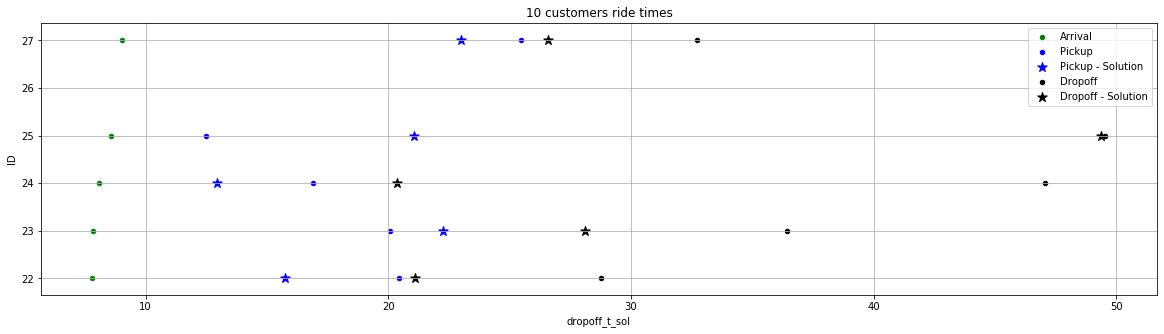

In [39]:
fig, ax = plt.subplots(figsize=(20,5))
idx1=20
idx2=25
comparison[idx1:idx2].plot(kind='scatter', x='arrival', y='ID', ax=ax, c='green')
comparison[idx1:idx2].plot(kind='scatter', x='pickup_t_simu', y='ID', ax=ax, c='blue')
comparison[idx1:idx2].plot(kind='scatter', x='pickup_t_sol', y='ID', ax=ax, c='blue', marker='*', s=100)
comparison[idx1:idx2].plot(kind='scatter', x='dropoff_t_simu', y='ID', ax=ax, c='black')
comparison[idx1:idx2].plot(kind='scatter', x='dropoff_t_sol', y='ID', ax=ax, c='black', marker = '*', s=100)

#df_clients.iloc[1:10].plot(kind='scatter', x='max_time', y='ID', ax=ax, c='red')
plt.legend(['Arrival', 'Pickup', 'Pickup - Solution', 'Dropoff', 'Dropoff - Solution'], loc=1)
plt.grid()
plt.title('10 customers ride times')
plt.show()

In [13]:
comparison['diff_arr'] = abs(comparison.pickup_t_simu - comparison.pickup_t_sol)

In [14]:
comparison.sort_values('diff_arr')

,ID,arrival,pickup_t_simu,dropoff_t_simu,vehicle_id,pickup_t_sol,dropoff_t_sol,excess_t,cust_id,diff_arr
4,5,2.10,13.722116,28.988282,1,13.770,33.729,19.959,5,0.047884
13,17,7.35,22.646800,28.382086,4,22.595,48.520,25.925,17,0.051800
71,76,33.08,48.668244,61.794978,6,48.571,71.326,22.755,76,0.097244
31,36,13.63,29.432594,34.665278,3,29.108,57.620,28.512,36,0.324594
11,15,7.10,14.431464,31.873566,2,14.055,35.514,21.459,15,0.376464
...,...,...,...,...,...,...,...,...,...,...
77,83,35.05,58.377142,68.334748,9,42.197,65.868,23.671,83,16.180142
29,34,13.18,44.066488,50.470138,10,21.491,21.491,0.000,34,22.575488
42,47,18.02,59.087476,65.410828,4,25.047,32.598,7.551,47,34.040476
1,2,0.03,58.421820,65.178456,2,7.793,10.821,3.028,2,50.628820
